<a href="https://colab.research.google.com/github/brhmv/SentenceSentiment/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install transformers datasets accelerate torch sentencepiece

In [6]:
labels_map = {
    0: "Çox mənfi",
    1: "Mənfi",
    2: "Neytral",
    3: "Müsbət",
    4: "Çox müsbət"
}

id2label = labels_map
label2id = {v: k for k, v in labels_map.items()}


In [38]:
labels_map = {
    0: "Çox mənfi",
    1: "Mənfi",
    2: "Neytral",
    3: "Müsbət",
    4: "Çox müsbət"
}

data = [
    # Çox mənfi (0)
    ("Bu məhsul tamamilə bərbaddır", 0),
    ("Həyatımda gördüyüm ən pis xidmət idi", 0),
    ("Bu tətbiq vaxt itkisidir", 0),
    ("Keyfiyyət sıfır səviyyəsindədir", 0),
    ("Puluma tam peşman oldum", 0),
    ("Bu telefon dəhşət dərəcədə pisdir", 0),
    ("Mən bunu heç kimə tövsiyə etmərəm", 0),
    ("Dərs Tam bir fiaskodur", 0),
    ("Gözləntilərimi yerlə bir etdi", 0),
    ("Hər şey səhv idi", 0),
    ("Əmanət edilmiş məbləğ geri qaytarılmadı", 0),
    ("Sistem tamamilə çökdü, heç işləmədi", 0),
    ("İnternet provayderi davamlı bağlantı problemi yaradır", 0),
    ("Qəzəbdən partlamaq üzrəyəm və məmnuniyyətsizəm", 0),
    ("Məhsulun göndərilmə müddəti cəmiyyətsiz və dözülməzdir", 0),
    ("Hesabdan çıxarmaq istəyirəm və bağlamaq istəyirəm", 0),
    ("Vaxtımı və pulumu oğurladılar, məni aldadıblar", 0),
    ("Tənha və kədərli hiss edirəm bu vəziyyətdən sonra", 0),
    ("Düzəltmək mümkün olmayan böyük bir xəta baş verdi", 0),
    ("Nifrət edirəm və ümidlərimi məhv etdi bu təcrübə", 0),

    # Mənfi (1)
    ("Xidmət yaxşı deyildi", 1),
    ("Mən razı qalmadım", 1),
    ("Bir az məyus oldum", 1),
    ("Keyfiyyət zəifdir", 1),
    ("Gecikmə oldu", 1),
    ("Bu məhsul faydalı deyil", 1),
    ("Servis yaxşı ola bilərdi", 1),
    ("Problemlər yaşadım", 1),
    ("Qiymətini qarşılamır", 1),
    ("Bir az pis təcrübə oldu", 1),
    ("Universitetdə xidmət səviyyəsi çox zəif idi", 1),
    ("Bankın mobil tətbiqi istifadəçi dostu deyil və mürəkkəbdir", 1),
    ("Kafeinli içki məni narahat etdi və narahatlıq hissi yaratdı", 1),
    ("Təlimatlar qeyri-müəyyən və aydın deyil, çaşdırıcıdır", 1),
    ("Bu yemək dadı baxımından orta və maraqlı deyil", 1),
    ("Rəng çalarları gözləniləndən solğun və cansızdır", 1),
    ("Toplantı vaxtı uzun və səmərəsiz keçdi, yorucu idi", 1),
    ("Məhsulun çatdırılması gözləniləndən gec və ləng oldu", 1),
    ("Qənaət edəcəyimi düşündüm amma əslində baha başa gəldi", 1),
    ("Bir az təəssüf keçirdim və narazılıq hiss edirəm", 1),

    # Neytral (2)
    ("Bugün hava normaldır", 2),
    ("Məhsul adi görünür", 2),
    ("Xüsusi fərqi yoxdur", 2),
    ("Normal bir təcrübə idi", 2),
    ("Nə yaxşı, nə pis", 2),
    ("Gözlədiyim kimi sıradan oldu", 2),
    ("Standart keyfiyyətdədir", 2),
    ("Adi bir gündür", 2),
    ("Heç bir problem yaşanmadı", 2),
    ("Orta səviyyədədir", 2),
    ("Təlim normal keçdi, xüsusi bir şey yox idi", 2),
    ("Hava proqnozu dəqiq idi və dəyişmədi, sabit qaldı", 2),
    ("Yolda hərəkət adi sıxlıqda və gözlənilən sürətdə idi", 2),
    ("Məzmun informativ idi amma heyrətamiz deyil, adi idi", 2),
    ("Kitabın üz qabığı orta və gözəldir, heyrətamiz deyil", 2),
    ("Həftəsonu planlarımız adi və sıradan şəkildə başa çatdı", 2),
    ("Yemək resepti asan və çətin deyil, orta səviyyədədir", 2),
    ("Filmin süjet xətti proqnozlaşdırıla bilən və təkrarlanandır", 2),
    ("Geyim materialı rahatdır amma nəfəs almır və əla deyil", 2),
    ("Qərar orta və qəti deyil, qeyri-müəyyən və açıqdır", 2),

    # Müsbət (3)
    ("Bu telefon xoşuma gəldi", 3),
    ("Xidmət kifayət qədər yaxşı idi", 3),
    ("Mən razı qaldım", 3),
    ("Keyfiyyət gözləntilərimi qarşıladı", 3),
    ("Yenidən istifadə edərəm", 3),
    ("Təcrübə müsbət oldu", 3),
    ("Bu məhsul faydalıdır", 3),
    ("Qiymətinə uyğundur", 3),
    ("Yaxşı seçimdir", 3),
    ("Ümumilikdə bəyəndim", 3),
    ("Yeni platforma əvvəlkindən xeyli yaxşıdır", 3),
    ("Uşaq bağçası personəli mehriban və köməkçi davranır", 3),
    ("Konsertin akustikası gözəl və aydın idi, təəssüratlandırıcı", 3),
    ("Həkim müayinəsi diqqətli və həssas şəkildə aparıldı", 3),
    ("Qəhvənin dadı zəngin və yumşaqdır, qənaətbəxş hiss etdirir", 3),
    ("Təqdimatın təşkili yaxşı və nizamlı idi, qaydaya salınmışdı", 3),
    ("Paltaryuyan maşın səssiz və səmərəli işləyir, rahatlıq verir", 3),
    ("Səhər yeməyi seçimləri geniş və cəlbedicidir, doyurucudur", 3),
    ("Kitabxananın atmosferi sakit və rahatdır, faydalı mühitdir", 3),
    ("Parkın təmizliyi nəzərə çarpır və görünür, xoşagələndir", 3),

    # Çox müsbət (4)
    ("Bu film möhtəşəmdir", 4),
    ("Hər şey mükəmməl idi", 4),
    ("Əla xidmət göstərildi", 4),
    ("Bu məhsulu çox sevdim", 4),
    ("Gözləntilərimi aşdı", 4),
    ("Fantastik təcrübə yaşadım", 4),
    ("Ən yaxşı seçim idi", 4),
    ("Möhtəşəm keyfiyyət", 4),
    ("Hər kəsə tövsiyə edirəm", 4),
    ("Çox yüksək səviyyədədir", 4),
    ("Bu layihə məni çox həyəcanlandırır", 4),
    ("Məzuniyyət təcrübəsi unudulmaz və ecazkar keçdi, heyrətli idi", 4),
    ("Konsert performansı nəfəs kəsici və enerjili idi, ilhamverici", 4),
    ("Uşağın il addımı möhtəşəm və təmtəraqlı qeyd olundu, sevindirici", 4),
    ("Elmi nailiyyət çığır açan və inqilabidir, nəhəng bir addımdır", 4),
    ("Nikah tədbiri sehrli və əsl xəyaldi, heyrətamiz təşkil olundu", 4),
    ("Yeni iş təklifi inanılmaz və gözlənilməz idi, sevinc və həyəcanlı", 4),
    ("Xilasetmə əməliyyatı igid və qəhrəmanlıqdır, heyranedici cəsarət", 4),
    ("Sənədli film dərin və həssas idi, təsirli və təsirləndirici", 4),
    ("Xeyriyyə təşəbbüsü ilhamverici və nümunəvidir, fəxr edirəm", 4),
]

print("Cümlə sayı:", len(data))

Cümlə sayı: 100


In [39]:
from datasets import Dataset

texts = [x[0] for x in data]
labels = [x[1] for x in data]

dataset = Dataset.from_dict({
    "text": texts,
    "label": labels
})

dataset


Dataset({
    features: ['text', 'label'],
    num_rows: 100
})

In [40]:
dataset = dataset.train_test_split(test_size=0.2, seed=42)


In [41]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "xlm-roberta-base"

tokenizer = AutoTokenizer.from_pretrained(model_name)

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=5,
    id2label=id2label,
    label2id=label2id
)


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

dataset = dataset.map(tokenize, batched=True)
dataset = dataset.remove_columns(["text"])
dataset.set_format("torch")


Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

In [49]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./xlmr-5sentiment",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=8,
    weight_decay=0.01,
    load_best_model_at_end=True,
    logging_dir="./logs",
    report_to="none"
)

In [50]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    tokenizer=tokenizer
)


/tmp/ipython-input-1166928743.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [51]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,1.587250
2,No log,1.642054
3,No log,1.575159
4,No log,1.548458
5,No log,1.543420
6,No log,1.539553
7,No log,1.524433
8,No log,1.516887


TrainOutput(global_step=80, training_loss=1.4025367736816405, metrics={'train_runtime': 386.0335, 'train_samples_per_second': 1.658, 'train_steps_per_second': 0.207, 'total_flos': 42098902794240.0, 'train_loss': 1.4025367736816405, 'epoch': 8.0})

In [46]:
import torch
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

def predict_sentiment(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)

    pred_id = torch.argmax(probs, dim=1).item()
    confidence = probs[0][pred_id].item()

    return id2label[pred_id], confidence
import torch
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

def predict_sentiment(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=1)

    pred_id = torch.argmax(probs, dim=1).item()
    confidence = probs[0][pred_id].item()

    return id2label[pred_id], confidence


In [52]:
sentences = [
    "Universitetdə xidmət səviyyəsi çox zəif idi.",
    "Bu layihə məni çox həyəcanlandırır!",
    "Təlim normal keçdi.",
    "Sistemdə xeyli problemlər var idi, narazı qaldım.",
    "Yeni platforma gözlədiyimdən daha yaxşı işləyir.",
    "Çox yüksək səviyyədədir"
]

for s in sentences:
    label, prob = predict_sentiment(s)
    print(f"{s} ---> {label} (ehtimal: {prob:.4f})")



Universitetdə xidmət səviyyəsi çox zəif idi. ---> Mənfi (ehtimal: 0.2289)
Bu layihə məni çox həyəcanlandırır! ---> Çox müsbət (ehtimal: 0.4181)
Təlim normal keçdi. ---> Müsbət (ehtimal: 0.3479)
Sistemdə xeyli problemlər var idi, narazı qaldım. ---> Müsbət (ehtimal: 0.2288)
Yeni platforma gözlədiyimdən daha yaxşı işləyir. ---> Müsbət (ehtimal: 0.3209)
Çox yüksək səviyyədədir ---> Çox müsbət (ehtimal: 0.3371)


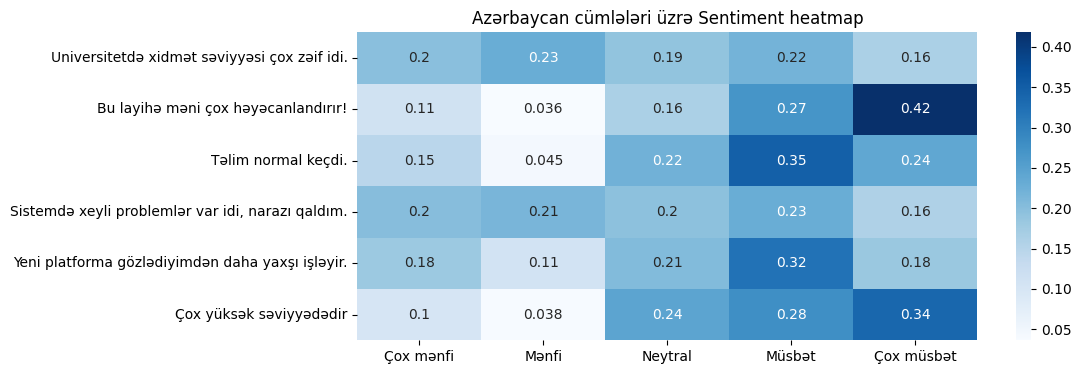

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

probs = []
for s in sentences:
    inputs = tokenizer(s, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    p = torch.softmax(outputs.logits, dim=1)[0].detach().cpu().numpy()
    probs.append(p)

plt.figure(figsize=(10,4))
sns.heatmap(probs, annot=True, cmap="Blues",
            yticklabels=sentences,
            xticklabels=list(labels_map.values()))
plt.title("Azərbaycan cümlələri üzrə Sentiment heatmap")
plt.show()

In [56]:
true_labels = {
    "Universitetdə xidmət səviyyəsi çox zəif idi.": "Çox Mənfi",
    "Bu layihə məni çox həyəcanlandırır!": "Çox müsbət",
    "Təlim normal keçdi.": "Neytral",
    "Sistemdə xeyli problemlər var idi, narazı qaldım.": "Çox Mənfi",
    "Yeni platforma gözlədiyimdən daha yaxşı işləyir.": "Çox Müsbət",
    "Çox yüksək səviyyədədir": "Çox müsbət"
}



llm_predictions = {
    "Universitetdə xidmət səviyyəsi çox zəif idi.": "Mənfi",
    "Bu layihə məni çox həyəcanlandırır!": "Çox müsbət",
    "Təlim normal keçdi.": "Neytral",
    "Sistemdə xeyli problemlər var idi, narazı qaldım.": "Mənfi",
    "Yeni platforma gözlədiyimdən daha yaxşı işləyir.": "Müsbət",
    "Çox yüksək səviyyədədir": "Çox müsbət"
}

results = []

for text in llm_predictions.keys():
    xlmr_label, xlmr_prob = predict_sentiment(text)

    results.append({
        "Cümlə": text,
        "Həqiqi label": true_labels[text],
        "LLM nəticəsi": llm_predictions[text],
        "XLM-R nəticəsi": xlmr_label,
        "XLM-R ehtimalı": round(xlmr_prob, 4)
    })

    import pandas as pd

df = pd.DataFrame(results)
df




,Cümlə,Həqiqi label,LLM nəticəsi,XLM-R nəticəsi,XLM-R ehtimalı
0,Universitetdə xidmət səviyyəsi çox zəif idi.,Çox Mənfi,Mənfi,Mənfi,0.2289
1,Bu layihə məni çox həyəcanlandırır!,Çox müsbət,Çox müsbət,Çox müsbət,0.4181
2,Təlim normal keçdi.,Neytral,Neytral,Müsbət,0.3479
3,"Sistemdə xeyli problemlər var idi, narazı qaldım.",Çox Mənfi,Mənfi,Müsbət,0.2288
4,Yeni platforma gözlədiyimdən daha yaxşı işləyir.,Çox Müsbət,Müsbət,Müsbət,0.3209
5,Çox yüksək səviyyədədir,Çox müsbət,Çox müsbət,Çox müsbət,0.3371
